<a href="https://colab.research.google.com/github/hws2002/Deep_Learning_with_Keras/blob/main/Chapter4/Chapter4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words = 10000
)

In [35]:
len(train_data)

8982

In [36]:
start_char = 1
oov_char = 2
word_index = reuters.get_word_index()
reverse_word_index = dict(
    (word, i) for (i, word) in word_index.items()
)

reverse_word_index[start_char] = "[START]"
reverse_word_index[oov_char] = "[OOV]"

In [37]:
decoded_newswire = " ".join(
    reverse_word_index[i] for i in train_data[0]
)
decoded_newswire

'[START] [OOV] [OOV] mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 psbr oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs'

# 데이터 준비

In [38]:
import numpy as np

# input 데이터 처리
def vectorize_sequences(sequences, dimension = 100000):
  results = np.zeros( (len(sequences), dimension) )
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i][j] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [39]:
# label 처리
def to_one_hot(labels, dimension = 46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
      results[i][label] = 1.
  return results

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [32]:
# 케라스에는 이를 위한 내장 함수가 있음
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

# 모델 구성

In [8]:
import keras
from keras import layers

model = keras.Sequential([
    layers.Dense(64, activation = "relu"),
    layers.Dense(64, activation = "relu"),
    layers.Dense(46, activation = "softmax"),
])

In [9]:
model.compile(
  optimizer = "rmsprop",
  loss = "categorical_crossentropy",
  metrics = ["accuracy"]
)

# 훈련 검증

In [40]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [11]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs = 20,
    batch_size = 512,
    validation_data = (x_val, y_val)
)

Epoch 1/20
16/16 [==============================] - 26s 2s/step - loss: 2.7433 - accuracy: 0.5427 - val_loss: 1.8824 - val_accuracy: 0.6440
Epoch 2/20
16/16 [==============================] - 8s 508ms/step - loss: 1.5654 - accuracy: 0.6814 - val_loss: 1.3840 - val_accuracy: 0.7010
Epoch 3/20
16/16 [==============================] - 8s 514ms/step - loss: 1.1924 - accuracy: 0.7388 - val_loss: 1.1854 - val_accuracy: 0.7340
Epoch 4/20
16/16 [==============================] - 8s 515ms/step - loss: 0.9773 - accuracy: 0.7870 - val_loss: 1.0860 - val_accuracy: 0.7530
Epoch 5/20
16/16 [==============================] - 8s 522ms/step - loss: 0.8156 - accuracy: 0.8225 - val_loss: 1.0187 - val_accuracy: 0.7720
Epoch 6/20
16/16 [==============================] - 8s 515ms/step - loss: 0.6804 - accuracy: 0.8503 - val_loss: 0.9583 - val_accuracy: 0.7880
Epoch 7/20
16/16 [==============================] - 8s 515ms/step - loss: 0.5712 - accuracy: 0.8745 - val_loss: 0.9559 - val_accuracy: 0.7920
Epoch 8/

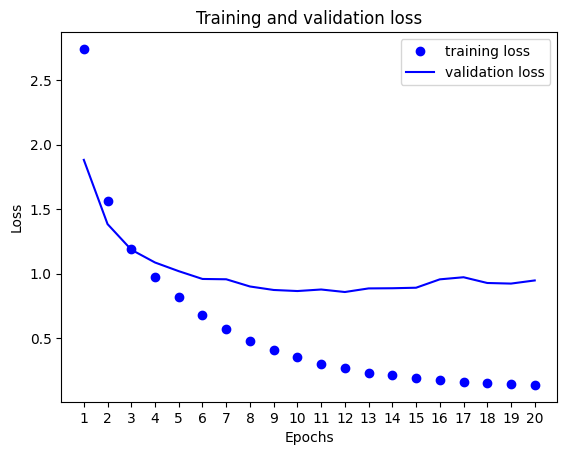

In [12]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label = "training loss")
plt.plot(epochs, val_loss, "b", label = "validation loss")
plt.title("Training and validation loss")
plt.xticks(epochs)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

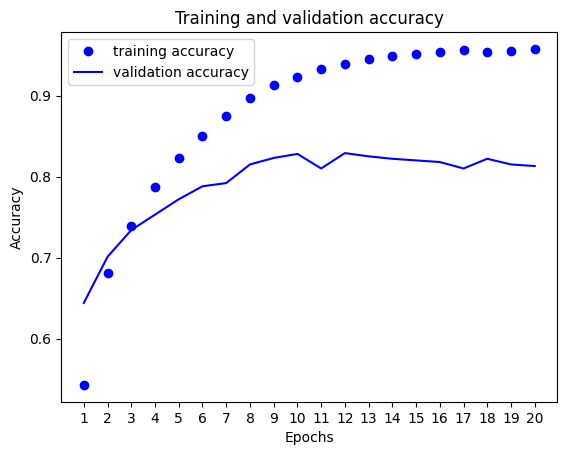

In [13]:

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, "bo", label = "training accuracy")
plt.plot(epochs, val_acc, "b", label = "validation accuracy")
plt.title("Training and validation accuracy")
plt.xticks(epochs)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

7번째 에포크 이후에 과대적합이 시작되므로, 7번의 에포크로 새로운 모델을 훈련하고 테스트 세트에서 평가해보자

In [14]:
model = keras.Sequential([
    layers.Dense(64, activation = "relu"),
    layers.Dense(64, activation = "relu"),
    layers.Dense(46, activation = "softmax"),
])

model.compile(
  optimizer = "rmsprop",
  loss = "categorical_crossentropy",
  metrics = ["accuracy"]
)

In [15]:
model.fit(
    partial_x_train,
    partial_y_train,
    epochs = 7,
    batch_size = 512,
    validation_data = (x_val, y_val)
)
results = model.evaluate(x_test, y_test)

Epoch 1/7
16/16 [==============================] - 25s 2s/step - loss: 2.6344 - accuracy: 0.5059 - val_loss: 1.8023 - val_accuracy: 0.6020
Epoch 2/7
16/16 [==============================] - 7s 468ms/step - loss: 1.5331 - accuracy: 0.6674 - val_loss: 1.3817 - val_accuracy: 0.6880
Epoch 3/7
16/16 [==============================] - 7s 461ms/step - loss: 1.1905 - accuracy: 0.7355 - val_loss: 1.1879 - val_accuracy: 0.7330
Epoch 4/7
16/16 [==============================] - 7s 455ms/step - loss: 0.9827 - accuracy: 0.7824 - val_loss: 1.1050 - val_accuracy: 0.7550
Epoch 5/7
16/16 [==============================] - 7s 448ms/step - loss: 0.8264 - accuracy: 0.8207 - val_loss: 1.0026 - val_accuracy: 0.7820
Epoch 6/7
16/16 [==============================] - 8s 488ms/step - loss: 0.6926 - accuracy: 0.8459 - val_loss: 0.9387 - val_accuracy: 0.8060
Epoch 7/7
71/71 [==============================] - 2s 26ms/step - loss: 0.9935 - accuracy: 0.7729


In [16]:
results

[0.9934834241867065, 0.7729296684265137]

이 모델은 78%에 가까운 정확도를 달성했음.  
균형 잡힌 이진 분류 문제에서 완전히 무작위로 분류하면 50%의 정확도를 달성함.  
하지만 이 문제는 46개의 클래스가 있고 클래스의 비율이 같지 않음.  
랜덤한 분류기를 사용하여 예측하면 정확도가 얼마나 나올까?

In [17]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.1829919857524488

약 19%의 분류 정확도를 달성함.  
따라서 앞서 확인한 모델의 결과는 꽤 좋은 것 같음.

# 새로운 데이터에 대해 예측하기

In [18]:
predictions = model.predict(x_test)

71/71 [==============================] - 1s 18ms/step


In [19]:
predictions

array([[1.7724017e-04, 3.2504770e-04, 5.6790625e-04, ..., 1.8675775e-05,
        8.8487323e-06, 4.3157965e-05],
       [3.5241693e-03, 7.4448101e-02, 4.2369150e-02, ..., 4.6033406e-04,
        5.5335204e-06, 6.4200925e-04],
       [6.4410074e-03, 6.6534477e-01, 1.3518785e-02, ..., 1.4653157e-03,
        3.1480781e-04, 4.4978686e-04],
       ...,
       [7.3600240e-05, 1.4629795e-03, 8.6489774e-04, ..., 1.6668398e-04,
        3.7754580e-05, 5.5693665e-05],
       [1.7922428e-03, 3.1607144e-02, 6.8943878e-03, ..., 4.0115439e-04,
        1.7269667e-04, 3.7856749e-04],
       [4.1491844e-04, 5.8669645e-01, 2.6345622e-02, ..., 1.1257407e-03,
        1.2299213e-04, 2.3280419e-04]], dtype=float32)

In [20]:
np.argmax(predictions, axis = 1)

array([ 3, 10,  1, ...,  3,  4,  1])

# Follow-up1 : 레이블과 손실을 다루는 다른 방법

레이블을 인코딩하는 다른 방법은 다음과 같이 정수 텐서로 변환하는 것임.  
이 방식을 사용하려면 손실 함수를 바꾸면 됨.  
`categorical_crossentropy'는 레이블이 범주형 인코딩되어 있을 것이라고 기대하므로, 'sparse_categorical_crossentropy'로 변환하면 됨.

In [21]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [22]:
model.compile(optimizer = "rmsprop",
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

새로운 레이블과 손실함수를 가지고 훈련과 예측을 해보자

In [23]:
partial_y_train = y_train[1000:]
y_val = y_train[:1000]

In [27]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs = 7,
    batch_size = 128,
    validation_data = (x_val, y_val)
)

Epoch 1/7
63/63 [==============================] - 20s 317ms/step - loss: 0.4275 - accuracy: 0.9049 - val_loss: 0.8750 - val_accuracy: 0.8150
Epoch 2/7
63/63 [==============================] - 16s 248ms/step - loss: 0.3207 - accuracy: 0.9282 - val_loss: 0.8602 - val_accuracy: 0.8240
Epoch 3/7
63/63 [==============================] - 15s 246ms/step - loss: 0.2566 - accuracy: 0.9406 - val_loss: 0.8888 - val_accuracy: 0.8220
Epoch 4/7
63/63 [==============================] - 15s 244ms/step - loss: 0.2094 - accuracy: 0.9499 - val_loss: 0.9524 - val_accuracy: 0.8110
Epoch 5/7
63/63 [==============================] - 16s 250ms/step - loss: 0.1871 - accuracy: 0.9514 - val_loss: 0.9759 - val_accuracy: 0.8070
Epoch 6/7
63/63 [==============================] - 16s 263ms/step - loss: 0.1714 - accuracy: 0.9521 - val_loss: 0.9959 - val_accuracy: 0.8110
Epoch 7/7
63/63 [==============================] - 15s 234ms/step - loss: 0.1610 - accuracy: 0.9551 - val_loss: 1.0107 - val_accuracy: 0.8070


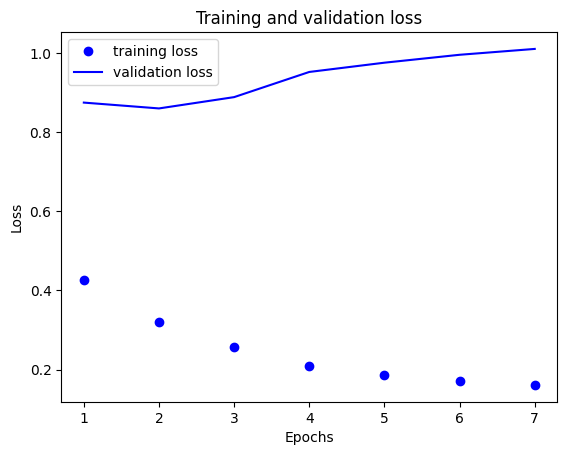

In [28]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label = "training loss")
plt.plot(epochs, val_loss, "b", label = "validation loss")
plt.title("Training and validation loss")
plt.xticks(epochs)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

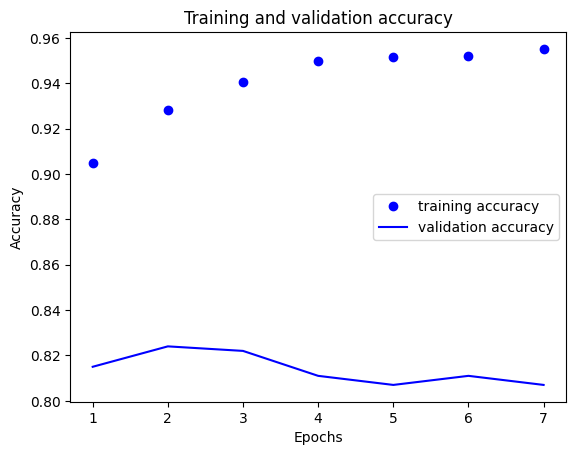

In [31]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, "bo", label = "training accuracy")
plt.plot(epochs, val_acc, "b", label = "validation accuracy")
plt.title("Training and validation accuracy")
plt.xticks(epochs)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [30]:
results = model.evaluate(x_test, y_test)
results

71/71 [==============================] - 2s 22ms/step - loss: 1.1161 - accuracy: 0.7845


[1.1160781383514404, 0.7845057845115662]

전체적으로 모델의 성능은 감소한것 같다.

# Follow-up2 : 충분히 큰 중간층을 두어야 하는 이유
마지막 출력이 46차원이기 때문에 중간층의 중간 유닛이 46개보다 많이 적어서는 안됨.  
46차원보다 훨씬 작은 중간층(예를 들어 4차원)을 두면 정보의 병목이 어떻게 나타나는지 확인해보자  

In [41]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [42]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [45]:
model = keras.Sequential([
    layers.Dense(64, activation = 'relu'),
    layers.Dense(4, activation = 'relu'),
    layers.Dense(46, activation = 'softmax')
])

model.compile(optimizer = "rmsprop",
              loss = 'categorical_crossentropy',
              metrics =['accuracy'])

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs = 20,
    batch_size = 128,
    validation_data = (x_val, y_val)
)

Epoch 1/20
63/63 [==============================] - 22s 341ms/step - loss: 2.8311 - accuracy: 0.3160 - val_loss: 2.2589 - val_accuracy: 0.4060
Epoch 2/20
63/63 [==============================] - 16s 258ms/step - loss: 1.9900 - accuracy: 0.4431 - val_loss: 1.8440 - val_accuracy: 0.4720
Epoch 3/20
63/63 [==============================] - 15s 241ms/step - loss: 1.5856 - accuracy: 0.5157 - val_loss: 1.5548 - val_accuracy: 0.5670
Epoch 4/20
63/63 [==============================] - 16s 250ms/step - loss: 1.3093 - accuracy: 0.6832 - val_loss: 1.3836 - val_accuracy: 0.6750
Epoch 5/20
63/63 [==============================] - 16s 250ms/step - loss: 1.1390 - accuracy: 0.7185 - val_loss: 1.3291 - val_accuracy: 0.6860
Epoch 6/20
63/63 [==============================] - 15s 239ms/step - loss: 1.0260 - accuracy: 0.7404 - val_loss: 1.2795 - val_accuracy: 0.7020
Epoch 7/20
63/63 [==============================] - 16s 247ms/step - loss: 0.9367 - accuracy: 0.7537 - val_loss: 1.2459 - val_accuracy: 0.7180

검증 정확도의 최고 값이 약 73%로 이전보다 감소했음을 알 수 있다.  
이런 손실의 원인 대부분은 많은 정보를 중간층의 저차원 표현 공간으로 압축하려고 했기 때문임.  
이 모델은 필요한 정보 대부분을 4차원 표현 안에 구겨 넣었지만 전부는 넣지 못함.

In [46]:
results = model.evaluate(x_test, y_test)
results

71/71 [==============================] - 1s 18ms/step - loss: 1.8316 - accuracy: 0.6932


[1.8315675258636475, 0.6932324171066284]

# Follow-up3
1. 더 크거나 작은 층을 사용해 보자. (32개의 유닛, 128개의 유닛 등)  
2. 여기에선 최종 소프트맥스 분류 층 이전에 2개의 중간층을 사용했음. 1개나 3개의 중간층을 사용해 보자.